#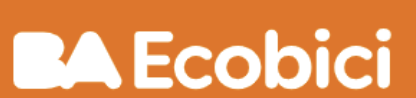***The BsAs bicycle company***



#Objetive:

Increase in 18% for the current year the adoption rate of
bike rides and in consequence bike stations with available bicycles.

# Used tools:

- Pandas for reading the data
- Matplotlib, seaborn and plotly for graphics

In [1]:
!pip install geopandas
!pip install

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns
import json

from shapely.wkt import loads
from shapely.geometry import Point
from PIL import Image
from wordcloud import WordCloud

from urllib.request import urlopen

import gc

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data upload

The variables are loaded and the data set is read.

In [3]:
import os

carpeta_drive = '/content/drive/MyDrive/Analisis_bicicletas'
os.chdir(carpeta_drive)

In [4]:
import zipfile

archivo_zip = 'recorridos_realizados_2023.zip'
destino_extraccion = '/content/drive/MyDrive/Analisis_bicicletas/'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(destino_extraccion)

In [5]:
import pandas as pd
import zipfile
import os

archivo_zip = 'recorridos_realizados_2023.zip'
destino_extraccion = '/content/drive/MyDrive/Analisis_bicicletas/'


ruta_archivo_zip = os.path.join(destino_extraccion, archivo_zip)

nombre_archivo_csv = 'recorridos_realizados_2023.csv'
ruta_archivo_csv_zip = os.path.join(destino_extraccion, nombre_archivo_csv)

with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
    zip_ref.extract(nombre_archivo_csv, destino_extraccion)

# Loading the CSV file into a Pandas DataFrame
ruta_archivo_csv = os.path.join(destino_extraccion, nombre_archivo_csv)
recorridos = pd.read_csv(ruta_archivo_csv)

###Bike tours 2023

Due to the size of the file, we proceed to take it to drive and convert it to zip, then decompress it to CSV within our code.

In [7]:
recorridos.head(5)

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
0,1,17910696BAEcobici,"1,848",2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE
2,3,17255670BAEcobici,"1,103",2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE
3,4,17996972BAEcobici,"1,165",2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE


In [8]:
recorridos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622331 entries, 0 to 2622330
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   Id_recorrido                object 
 2   duracion_recorrido          object 
 3   fecha_origen_recorrido      object 
 4   id_estacion_origen          object 
 5   nombre_estacion_origen      object 
 6   direccion_estacion_origen   object 
 7   long_estacion_origen        float64
 8   lat_estacion_origen         float64
 9   fecha_destino_recorrido     object 
 10  id_estacion_destino         object 
 11  nombre_estacion_destino     object 
 12  direccion_estacion_destino  object 
 13  long_estacion_destino       float64
 14  lat_estacion_destino        float64
 15  id_usuario                  object 
 16  modelo_bicicleta            object 
 17  género                      object 
dtypes: float64(4), int64(1), object(13)
memory usage: 360.1+ MB


###Bike stations

In [ ]:
import pandas as pd
import os

# Ruta del archivo CSV "estaciones"
ruta_archivo_csv_estaciones = '/content/drive/MyDrive/Analisis_bicicletas/estaciones.csv'

# Carga del archivo CSV "estaciones" en un DataFrame de Pandas
df_estaciones = pd.read_csv(ruta_archivo_csv_estaciones, encoding='ISO-8859-1', error_bad_lines=False, skipfooter=1, delimiter=';')

In [9]:
df_estaciones.head(5)

,ID Comet,NÚMERO de Estación,NOMBRE,DIRECCIÓN,BARRIO,COMUNA,EMPLAZAMIENTO,LATITUD,LONGITUD
0,2,2,RETIRO I,Av. Dr. José María Ramos Mejía 1300,RETIRO,COMUNA 1,PLAZA,-34.592424,-58.374710
1,3,3,ADUANA,Moreno 4,MONSERRAT,COMUNA 1,VEREDA,-34.611100,-58.368200
2,4,4,PLAZA ROMA,Av. Corrientes 100,SAN NICOLAS,COMUNA 1,VEREDA,-34.602995,58.368832
3,5,5,PLAZA ITALIA,Av. Sarmiento 2601,PALERMO,COMUNA 14,VEREDA,-34.580700,-58.420400
4,6,6,PARQUE LEZAMA,Av. Martín Garcia 295,SAN TELMO,COMUNA 1,PLAZA,-34.628300,-58.369400


In [10]:
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Comet             359 non-null    int64  
 1   NÚMERO de Estación   359 non-null    int64  
 2   NOMBRE               359 non-null    object 
 3   DIRECCIÓN            359 non-null    object 
 4   BARRIO               359 non-null    object 
 5   COMUNA               359 non-null    object 
 6   EMPLAZAMIENTO        359 non-null    object 
 7   LATITUD              359 non-null    float64
 8   LONGITUD             359 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 25.4+ KB


###Mechanical bike service

In [10]:
import pandas as pd
import os

# Ruta del archivo CSV "mecánica"
ruta_archivo_csv_mecanica = '/content/drive/MyDrive/Analisis_bicicletas/mecanica.csv'

# Carga del archivo CSV "mecánica" en un DataFrame de Pandas
df_mecanica = pd.read_csv(ruta_archivo_csv_mecanica, encoding='ISO-8859-1', error_bad_lines=False, skipfooter=1, delimiter=';')

<ipython-input-10-42f943a26d58>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_mecanica = pd.read_csv(ruta_archivo_csv_mecanica, encoding='ISO-8859-1', error_bad_lines=False, skipfooter=1, delimiter=';')
<ipython-input-10-42f943a26d58>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_mecanica = pd.read_csv(ruta_archivo_csv_mecanica, encoding='ISO-8859-1', error_bad_lines=False, skipfooter=1, delimiter=';')


In [11]:
df_mecanica.head(5)

,LUGAR,UBICACION,ESTADO,LUNES_A_VIERNES,SA_DO_FE,DIRECCION_NORMALIZADA,CALLE,ALTURA,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LAT,LNG
0,PARQUE LOS ANDES,ESTACION SALUDABLE,INSTALADO,08:30 A 12:30 Y DE 15:00 A 19:00,09:00 A 18:00,DORREGO AV. Y CORRIENTES AV.,DORREGO AV.,NaN,CHACARITA,COMUNA 15,NaN,NaN,-34.591699,-58.447601
1,PARQUE CENTENARIO,ESTACION SALUDABLE,INSTALADO,08:00 A 12:00 Y DE 14:30 A 18:30,09:00 A 19:00,DIAZ VELEZ AV. 4800,DIAZ VELEZ AV.,4800.0,CABALLITO,COMUNA 6,1405.0,C1405DCP,-34.608666,-58.434804
2,ROSEDAL,ESTACION SALUDABLE,INSTALADO,08:00 A 12:00 Y DE 15:00 A 19:00,09:00 A 18:00,SARMIENTO AV. E IRAOLA AV.,SARMIENTO AV.,NaN,PALERMO,COMUNA 14,NaN,NaN,-34.572146,-58.412468
3,RUBEN DARIO,ESTACION SALUDABLE,INSTALADO,08:00 A 21:00,09:00 A 18:00,"DEL LIBERTADOR AV. Y AGOTE, LUIS DR.",DEL LIBERTADOR AV.,NaN,RECOLETA,COMUNA 2,NaN,NaN,-34.584051,-58.393913
4,PARQUE PATRICIOS,ESTACION SALUDABLE,INSTALADO,09:00 A 18:00,09:00 A 18:00,PATAGONES Y MONTEAGUDO,PATAGONES,NaN,PARQUE PATRICIOS,COMUNA 4,NaN,NaN,-34.638341,-58.405401


In [13]:
df_mecanica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LUGAR                    18 non-null     object 
 1   UBICACION                18 non-null     object 
 2   ESTADO                   18 non-null     object 
 3   LUNES_A_VIERNES          15 non-null     object 
 4   SA_DO_FE                 15 non-null     object 
 5   DIRECCION_NORMALIZADA    17 non-null     object 
 6   CALLE                    17 non-null     object 
 7   ALTURA                   3 non-null      float64
 8   BARRIO                   17 non-null     object 
 9   COMUNA                   17 non-null     object 
 10  CODIGO_POSTAL            3 non-null      float64
 11  CODIGO_POSTAL_ARGENTINO  3 non-null      object 
 12  LAT                      17 non-null     float64
 13  LNG                      17 non-null     float64
dtypes: float64(4), object(10)
me

##ANALYSIS AND VISUALIZATIONS

**Most trending stations.
Are the same trend for starting stations or finishing?**

In this case, what we can do is make bar graphs of the ten most used start and arrival stations, in addition, we can calculate the correlation between them to see how related they are. It is observed that the most used starting station is in Constitución and the arrival station is Pacífico, with a correlation of 89%.

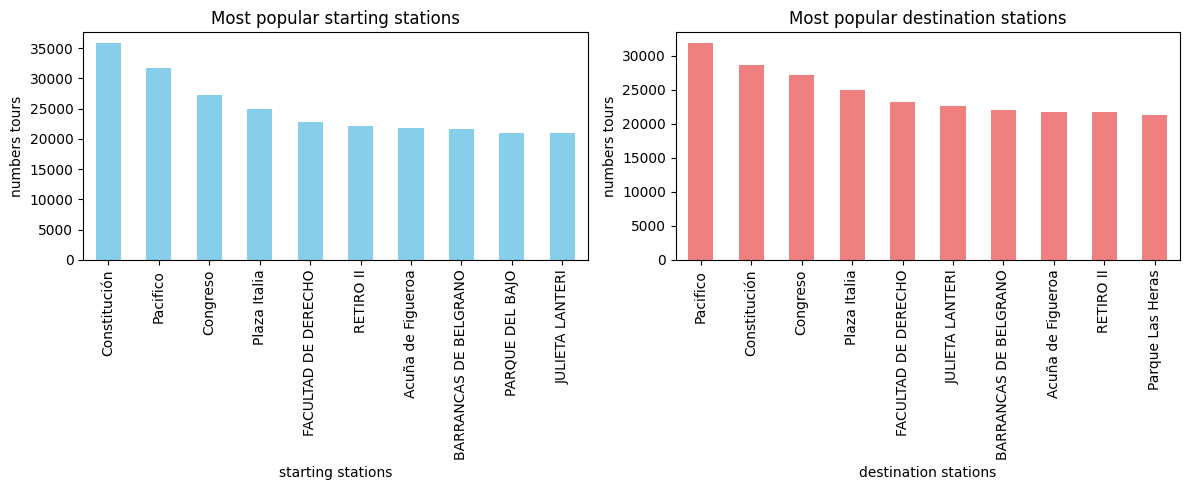

correlation between start and destination stations: 0.89


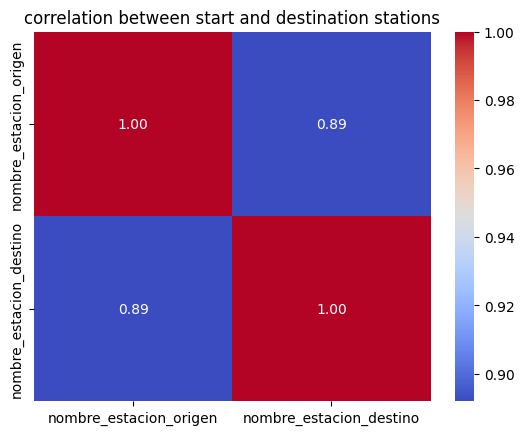

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estaciones de inicio más populares
top_origen = recorridos['nombre_estacion_origen'].value_counts().head(10)

# Estaciones de destino más populares
top_destino = recorridos['nombre_estacion_destino'].value_counts().head(10)

# Extraer solo el nombre de la estación (suponiendo que el formato es "Número - Nombre")
top_origen.index = top_origen.index.str.split('-', n=1).str[1].str.strip()
top_destino.index = top_destino.index.str.split('-', n=1).str[1].str.strip()

# Calcular la correlación entre las frecuencias de inicio y destino
correlacion = top_origen.corr(top_destino)

# Gráfico de barras para estaciones de inicio
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_origen.plot(kind='bar', color='skyblue')
plt.title('Most popular starting stations')
plt.xlabel('starting stations')
plt.ylabel('numbers tours')

# Gráfico de barras para estaciones de destino
plt.subplot(1, 2, 2)
top_destino.plot(kind='bar', color='lightcoral')
plt.title('Most popular destination stations')
plt.xlabel('destination stations')
plt.ylabel('numbers tours')

plt.tight_layout()
plt.show()

# Mostrar la correlación
print(f'correlation between start and destination stations: {correlacion:.2f}')

# Mapa de calor para visualizar la correlación
sns.heatmap(pd.concat([top_origen, top_destino], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation between start and destination stations')
plt.show()

In the context of a bike-sharing system, this could mean that there is a significant tendency for users to return their bikes to the same station they took them from.

Possible interpretations:

- Circular or return routes: Users may be using the bicycles to make circular or return routes, returning to the same starting station after a tour.
- Strategic location of stations: The strong correlation could indicate that certain stations are preferred start and end points due to their strategic location, connectivity or popularity.
- User habits: User behavior patterns can influence this correlation. For example, some users may use bicycles to go to work and return home, generating a strong association between the starting and finishing stations.

**Mainstream Day of the week**

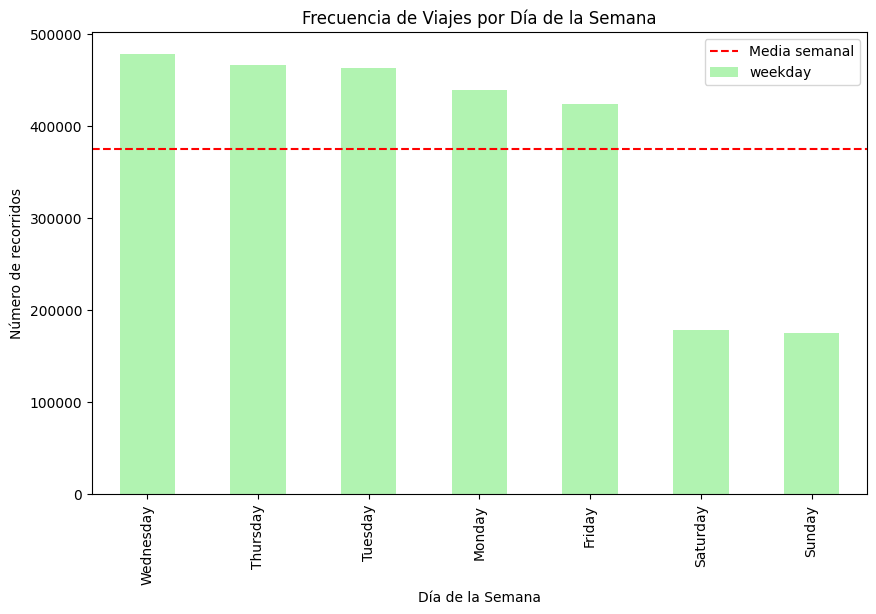

Most popular day of the week: Wednesday


In [17]:
import matplotlib.pyplot as plt

# Convertir la columna de fecha a tipo datetime
recorridos['fecha_origen_recorrido'] = pd.to_datetime(recorridos['fecha_origen_recorrido'])

# Crear una nueva columna para el día de la semana
recorridos['weekday'] = recorridos['fecha_origen_recorrido'].dt.day_name()

# Calcular la frecuencia de viajes para cada día de la semana
frecuencia_dias = recorridos['weekday'].value_counts()

# Identificar el día de la semana con más viajes
mainstream_day = frecuencia_dias.idxmax()
media_dia_semana = recorridos.groupby('weekday')['Id_recorrido'].count().mean()

# Gráfico de barras para la frecuencia de viajes por día de la semana
plt.figure(figsize=(10, 6))
frecuencia_dias.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.axhline(y=media_dia_semana, color='red', linestyle='--', label='Media semanal')
plt.title('Frecuencia de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de recorridos')
plt.legend()
plt.show()

# Mostrar el día de la semana más popular
print(f'Most popular day of the week: {mainstream_day}')


**Mainstream hours**

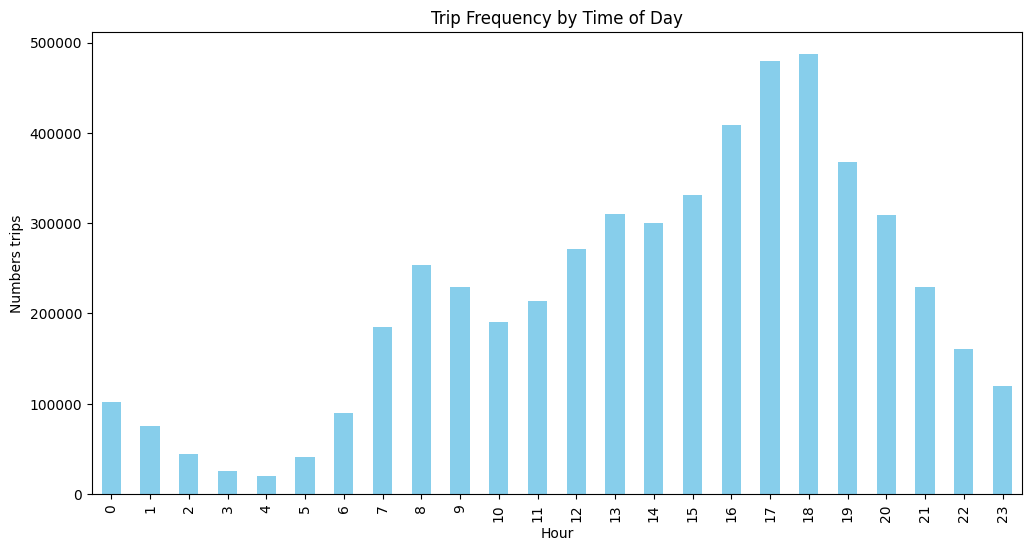

Mainstream hour: 18


In [15]:
import matplotlib.pyplot as plt

# Convertir las columnas de fecha y hora a tipo datetime
recorridos['fecha_origen_recorrido'] = pd.to_datetime(recorridos['fecha_origen_recorrido'])
recorridos['fecha_destino_recorrido'] = pd.to_datetime(recorridos['fecha_destino_recorrido'])

# Crear nuevas columnas para la hora de inicio y fin
recorridos['hour_origen'] = recorridos['fecha_origen_recorrido'].dt.hour
recorridos['hour_destino'] = recorridos['fecha_destino_recorrido'].dt.hour

# Unir las dos series de horas
horas = pd.concat([recorridos['hour_origen'], recorridos['hour_destino']])

# Calcular la frecuencia de viajes por hora del día
frecuencia_horas = horas.value_counts().sort_index()

# Identificar las horas de mayor frecuencia
mainstream_hours = frecuencia_horas.idxmax()

# Gráfico de barras para la frecuencia de viajes por hora del día
plt.figure(figsize=(12, 6))
frecuencia_horas.plot(kind='bar', color='skyblue')
plt.title('Trip Frequency by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Numbers trips')
plt.show()

# Mostrar las horas principales
print(f'Mainstream hour: {mainstream_hours}')

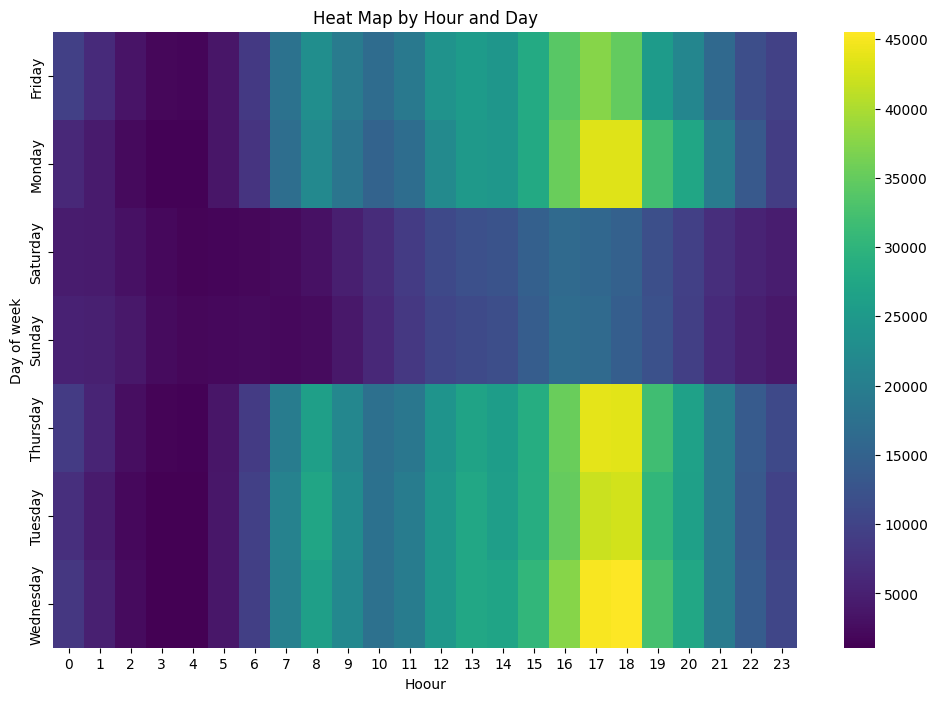

In [18]:
# heat map by hour and day
heatmap_data = recorridos.pivot_table(index='weekday', columns='hour_origen', values='Id_recorrido', aggfunc='count')

# Gráph
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='g')
plt.title('Heat Map by Hour and Day')
plt.xlabel('Hoour')
plt.ylabel('Day of week')
plt.show()

With these two graphs we can confirm that the least used days are Saturdays and Sundays, the most popular day is Wednesday and the most popular hours are 5 and 6 p.m.

**Average rides per week**

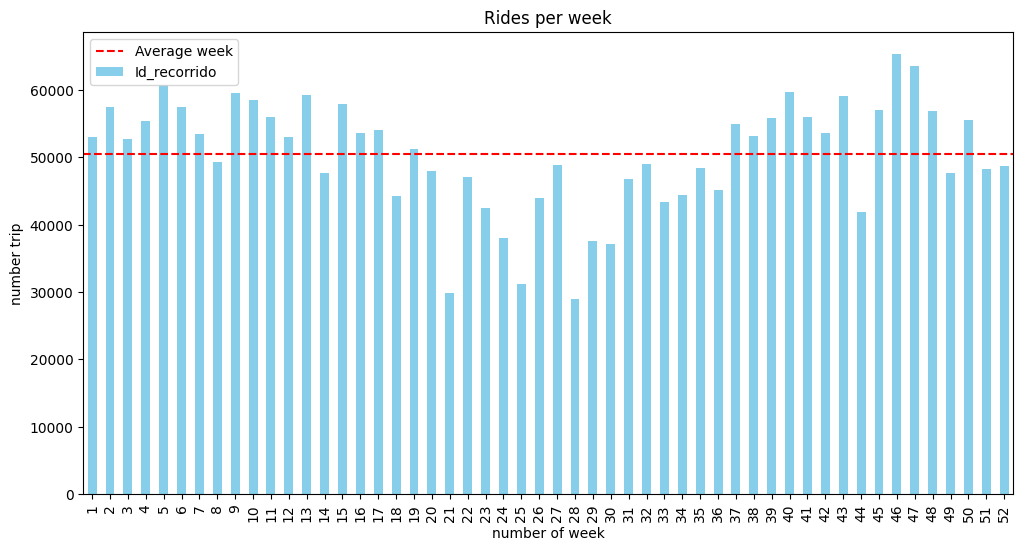

Average rides per week: 50429.44


In [57]:
import matplotlib.pyplot as plt

recorridos['fecha_origen_recorrido'] = pd.to_datetime(recorridos['fecha_origen_recorrido'])

recorridos['week'] = recorridos['fecha_origen_recorrido'].dt.isocalendar().week

promedio_rec_per_week = recorridos.groupby('week')['Id_recorrido'].count().mean()

# Bar chart for number of rides per week
plt.figure(figsize=(12, 6))
recorridos.groupby('week')['Id_recorrido'].count().plot(kind='bar', color='skyblue')
plt.axhline(y=promedio_rec_per_week, color='red', linestyle='--', label='Average week')
plt.title('Rides per week')
plt.xlabel('number of week')
plt.ylabel('number trip')
plt.legend()
plt.show()

# Show number of rides per week
print(f'Average rides per week: {promedio_rec_per_week:.2f}')

In case we want to calculate the average number of trips per week, we can use the date and time column to group the data weekly and then calculate the average. In this case it is seen that the average per week is 50429 trips

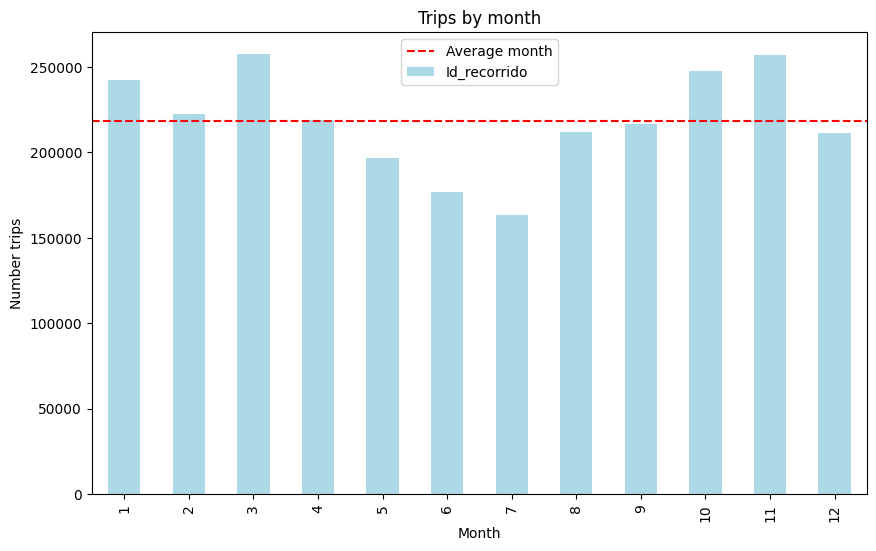

Average by month: 218527.58


In [69]:
# new column
recorridos['month'] = recorridos['fecha_origen_recorrido'].dt.month

# average month
promedio_rec_per_month = recorridos.groupby('month')['Id_recorrido'].count().mean()

# Graph
plt.figure(figsize=(10, 6))
recorridos.groupby('month')['Id_recorrido'].count().sort_index().plot(kind='bar', color='lightblue')
plt.axhline(y=promedio_rec_per_month, color='red', linestyle='--', label='Average month')
plt.title('Trips by month')
plt.xlabel('Month')
plt.ylabel('Number trips')
plt.legend()
plt.show()

# show average by month
print(f'Average by month: {promedio_rec_per_month:.2f}')

In addition to seeing this information per week, we can see the information monthly. In this case, average by month is 218527.

**Are there enough bikes or the government should consider a redistribution of bikes? If yes, how can you re-think or justify the changes proposed?**

Based on the provided information, we can derive several conclusions and recommendations for the government:

- Demand Patterns:
Wednesdays and Thursdays show the highest demand for bike rides, indicating a potential need for increased resources and services on those days.
- Peak Hours:
The peak hour at 17:00 appears to be the busiest, suggesting a need for more bikes and possibly additional service stations during that timeframe.
- Popular Stations:
Popular stations as both origin and destination include "Constitución," "Pacífico," "Congreso," "Plaza Italia," and "Facultad de Derecho." Consideration could be given to increasing capacity and services at these stations.
-Investment in Bicycles:
Given the high demand, it might be beneficial for the government to invest in more bicycles, especially during peak days and hours.
-Promotion of Services on Less Busy Days:
Explore the implementation of promotional programs or discounts on less busy days to encourage bicycle usage during those periods.

In [11]:

recorridos['fecha_origen_recorrido'] = pd.to_datetime(recorridos['fecha_origen_recorrido'])

recorridos['dia_semana'] = recorridos['fecha_origen_recorrido'].dt.day_name()
recorridos['hora_dia'] = recorridos['fecha_origen_recorrido'].dt.hour


demanda_dia_semana = recorridos['dia_semana'].value_counts()
demanda_hora_dia = recorridos['hora_dia'].value_counts()


print("Demand by day of the week:")
print(demanda_dia_semana.head())

print("\nDemand by hour of the day:")
print(demanda_hora_dia.head())


Demand by day of the week:
Wednesday    477729
Thursday     465783
Tuesday      462266
Monday       438908
Friday       423374
Name: dia_semana, dtype: int64

Demand by hour of the day:
17    243792
18    238880
16    210115
19    176132
15    172402
Name: hora_dia, dtype: int64


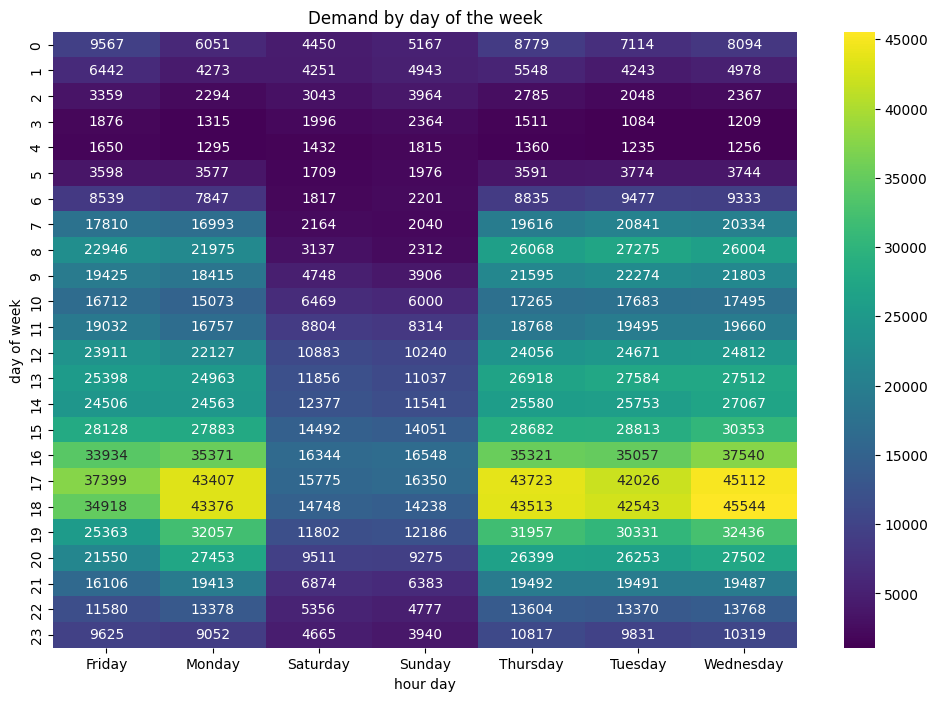

In [20]:
# demand trips
demanda_recorridos = recorridos.groupby(['hour_origen', 'weekday'])['Id_recorrido'].count().unstack()

# Gráph
plt.figure(figsize=(12, 8))
sns.heatmap(demanda_recorridos, cmap='viridis', annot=True, fmt='g')
plt.title('Demand by day of the week')
plt.xlabel('hour day')
plt.ylabel('day of week')
plt.show()

Most popular stations as origin or destination (top 5):
147 - CONSTITUCIÓN           64458
014 - PACIFICO               63561
008 - CONGRESO               54445
005 - PLAZA ITALIA           49972
001 - FACULTAD DE DERECHO    45968
dtype: int64


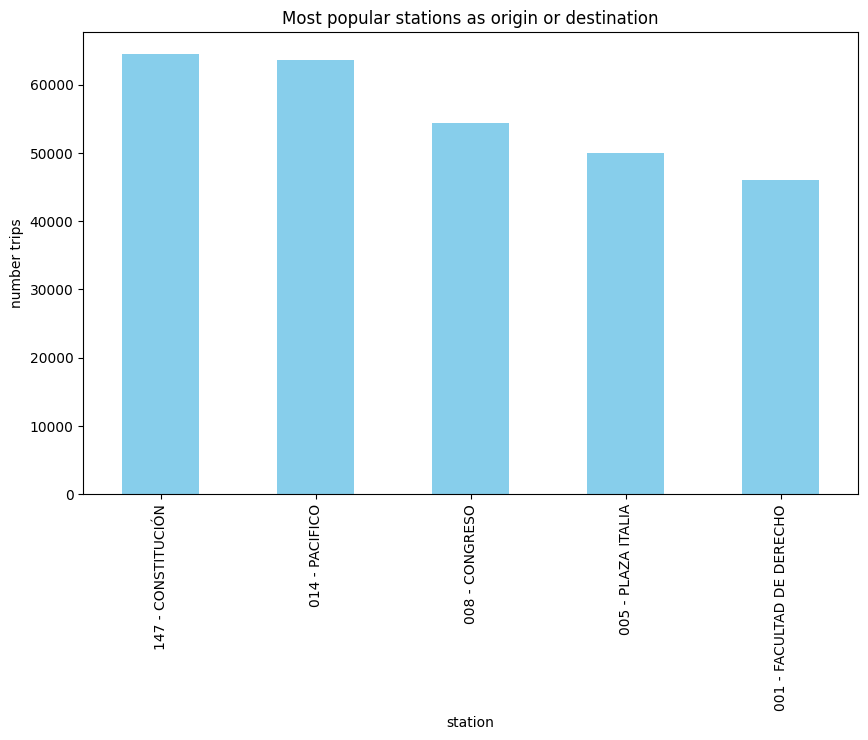

In [21]:
import matplotlib.pyplot as plt


recorridos['nombre_estacion_origen'] = recorridos['nombre_estacion_origen'].str.strip().str.upper()
recorridos['nombre_estacion_destino'] = recorridos['nombre_estacion_destino'].str.strip().str.upper()

# origin demand
demanda_origen = recorridos['nombre_estacion_origen'].value_counts()

# final demand
demanda_destino = recorridos['nombre_estacion_destino'].value_counts()

# total dmand
demanda_total = demanda_origen.add(demanda_destino, fill_value=0).astype(int)

# most popular stations
top_estaciones_demandadas = demanda_total.nlargest(5)
print("Most popular stations as origin or destination (top 5):")
print(top_estaciones_demandadas)


plt.figure(figsize=(10, 6))
top_estaciones_demandadas.plot(kind='bar', color='skyblue')
plt.title('Most popular stations as origin or destination')
plt.xlabel('station')
plt.ylabel('number trips')
plt.show()



**Average time per ride**

In [14]:
# astype duration
recorridos['duracion_recorrido'] = recorridos['duracion_recorrido'].astype(str)

# change
recorridos['duracion_recorrido'] = recorridos['duracion_recorrido'].str.replace(',', '.')

# delete dot
recorridos['duracion_recorrido'] = recorridos['duracion_recorrido'].str.replace('.', '')

# Convert to float
recorridos['duracion_recorrido'] = recorridos['duracion_recorrido'].astype(float) / 60

# Calculate average time per ride
tiempo_promedio_por_recorrido = recorridos['duracion_recorrido'].mean()

print(f"Average time per ride: {tiempo_promedio_por_recorrido:.2f} minutos")


<ipython-input-14-09f7651e8307>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recorridos['duracion_recorrido'] = recorridos['duracion_recorrido'].str.replace('.', '')


Average time per ride: 23.01 minutos


<ipython-input-87-490cbe833d53>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=recorridos_validos, x='género', y='duracion_recorrido', ci=None, estimator='mean', palette='pastel')
<ipython-input-87-490cbe833d53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recorridos_validos, x='género', y='duracion_recorrido', ci=None, estimator='mean', palette='pastel')


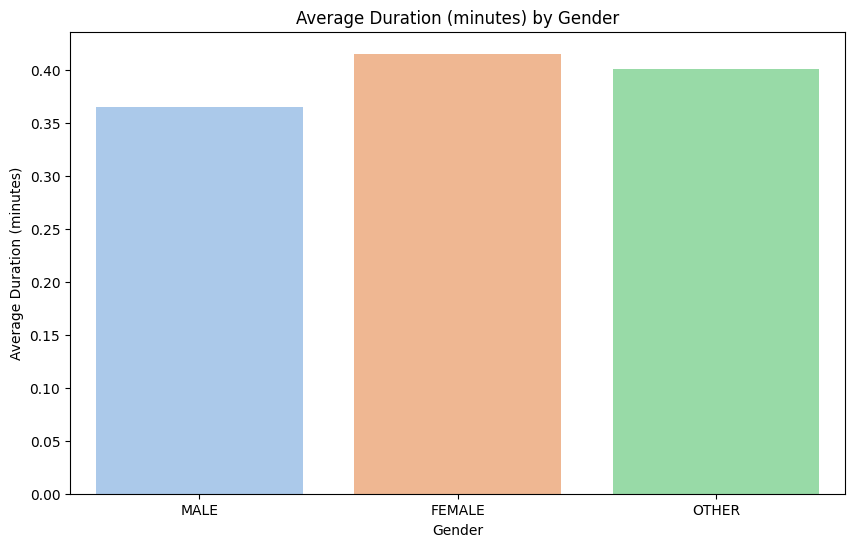

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

recorridos_validos = recorridos[recorridos['duracion_recorrido'].notna()]


recorridos_validos['duracion_recorrido'] = recorridos_validos['duracion_recorrido'] / 60

plt.figure(figsize=(10, 6))
sns.barplot(data=recorridos_validos, x='género', y='duracion_recorrido', ci=None, estimator='mean', palette='pastel')
plt.title('Average Duration (minutes) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (minutes)')
plt.show()


Based on this information, it can be seen that the average travel time is 23 minutes, and that the female gender is the one with the longest travel time.

**If you want to invest in a mechanical bike service for government bikes, where do you think is the best location and why?**

- Mechanic Service Points:
Communes 4, 6, and 14 have a relatively higher concentration of mechanic service points, indicating a proactive approach to bike maintenance in these areas.
Communes 1, 2, 3, 5, 7, 8, 9, 10, 11, and 15 have fewer or no reported mechanic service points. This suggests an opportunity to expand these services to enhance user satisfaction and reduce downtime due to mechanical issues.
- Bike Stations:
Commune 1 has a notable number of bike stations, but there are two entries for this commune in the data. It's essential to reconcile and verify the accurate count to avoid duplications in the analysis.
Communes 4 and 14, with high bike station numbers, may experience higher demand. Adequate resources and monitoring should be allocated to these areas to maintain service levels.
- Communes with Limited Services:
Communes 5, 8, and 9 have fewer stations and limited mechanic services. The government may consider strategically placing additional stations and mechanics in these areas to improve accessibility and user experience.
- User Accessibility:
Analyzing the distribution of stations and mechanics across communes ensures that users across the city have equitable access to bike-sharing services and maintenance facilities.
- Community Engagement:
In areas with limited services, community engagement programs could be implemented to raise awareness of available services, encourage bike usage, and gather user feedback for further improvements.
- integration with Public Transportation:
Consider integrating bike-sharing services with existing public transportation systems to create a seamless and comprehensive urban mobility solution.

<ipython-input-74-cec8403ca958>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estaciones_por_comuna.index, y=estaciones_por_comuna.values, palette='viridis')


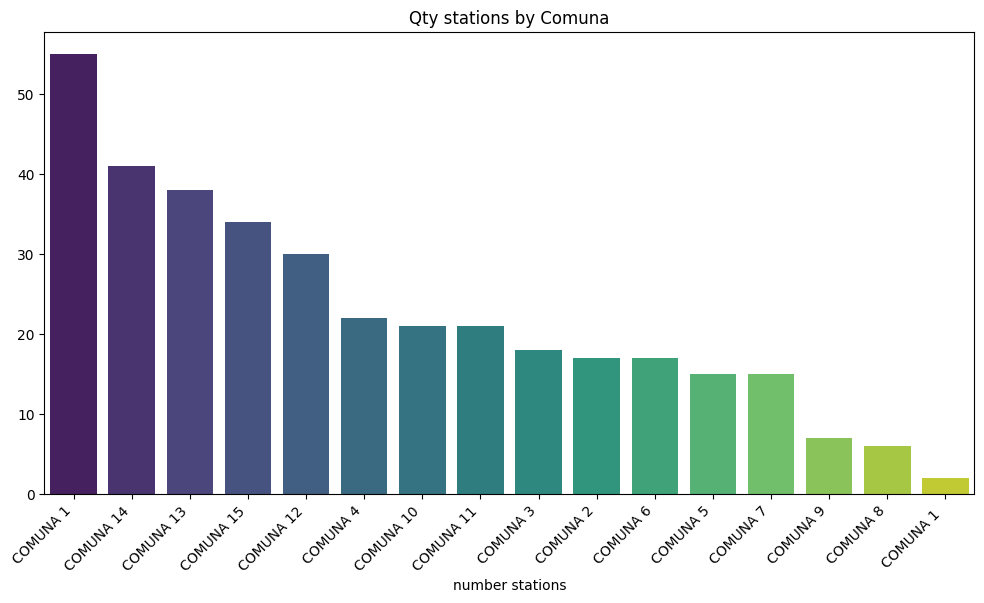


Qty stations by Comuna:
+-----------+--------------------------+
| Comuna    | number stations |
+-----------+--------------------------+
| COMUNA 1   |            55             |
| COMUNA 14  |            41             |
| COMUNA 13  |            38             |
| COMUNA 15  |            34             |
| COMUNA 12  |            30             |
| COMUNA 4   |            22             |
| COMUNA 10  |            21             |
| COMUNA 11  |            21             |
| COMUNA 3   |            18             |
| COMUNA 2   |            17             |
| COMUNA 6   |            17             |
| COMUNA 5   |            15             |
| COMUNA 7   |            15             |
| COMUNA 9   |             7             |
| COMUNA 8   |             6             |
| COMUNA 1   |             2             |
+-----------+--------------------------+


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


estaciones_por_comuna = df_estaciones['COMUNA'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=estaciones_por_comuna.index, y=estaciones_por_comuna.values, palette='viridis')
plt.title('Qty stations by Comuna')
plt.xlabel('number stations')
plt.xticks(rotation=45, ha='right')
plt.show()

# print information type table
print("\nQty stations by Comuna:")
print("+-----------+--------------------------+")
print("| Comuna    | number stations |")
print("+-----------+--------------------------+")
for comuna, cantidad_estaciones in zip(estaciones_por_comuna.index, estaciones_por_comuna.values):
    print(f"| {comuna:<10} | {cantidad_estaciones:^25} |")
print("+-----------+--------------------------+")



In [75]:
# merge the dataframes
df_unido = pd.merge(df_mecanica, df_estaciones, on='COMUNA', how='left')

In [76]:
mecanica_por_comuna = df_mecanica['COMUNA'].value_counts()

# Display the result
print("Cantidad de servicios mecánicos por comuna:")
print(mecanica_por_comuna)

Cantidad de servicios mecánicos por comuna:
COMUNA 4     4
COMUNA 14    3
COMUNA 6     2
COMUNA 15    1
COMUNA 2     1
COMUNA 9     1
COMUNA 7     1
COMUNA 12    1
COMUNA 8     1
COMUNA 3     1
COMUNA 1     1
Name: COMUNA, dtype: int64


<ipython-input-77-b1a7ab2f27e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mecanica_por_comuna.index, y=mecanica_por_comuna.values, palette='viridis')


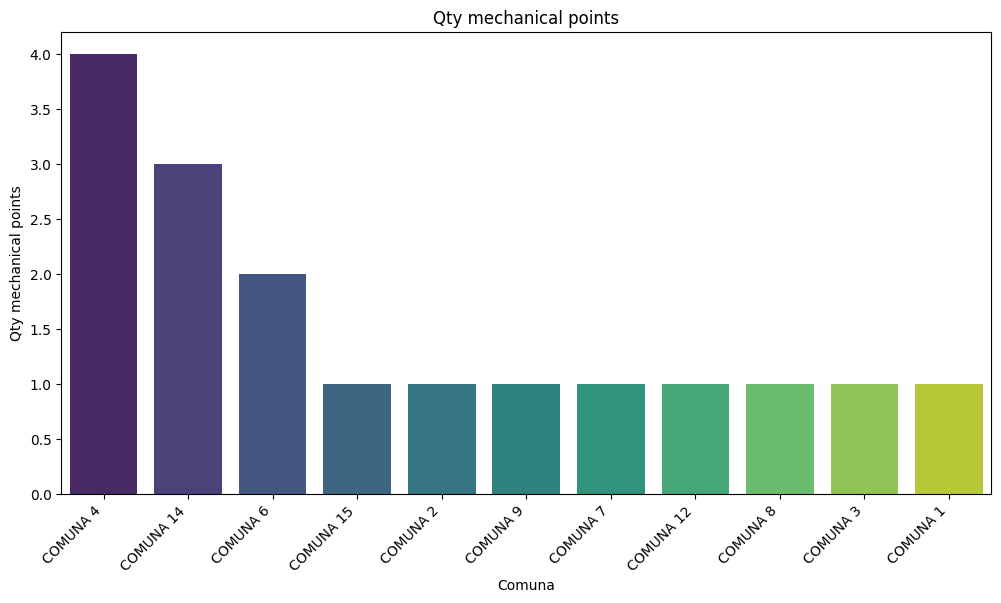

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mecanica_por_comuna.index, y=mecanica_por_comuna.values, palette='viridis')
plt.title('Qty mechanical points')
plt.xlabel('Comuna')
plt.ylabel('Qty mechanical points')
plt.xticks(rotation=45, ha='right')
plt.show()

In [88]:
merged_data = pd.merge(estaciones_por_comuna, mecanica_por_comuna, left_index=True, right_index=True, how='outer')

# Display the result
print("Information merged:")
print(merged_data)

Information merged:
           COMUNA_x  COMUNA_y
COMUNA 1         55       1.0
COMUNA 1          2       NaN
COMUNA 10        21       NaN
COMUNA 11        21       NaN
COMUNA 12        30       1.0
COMUNA 13        38       NaN
COMUNA 14        41       3.0
COMUNA 15        34       1.0
COMUNA 2         17       1.0
COMUNA 3         18       1.0
COMUNA 4         22       4.0
COMUNA 5         15       NaN
COMUNA 6         17       2.0
COMUNA 7         15       1.0
COMUNA 8          6       1.0
COMUNA 9          7       1.0


In [19]:
import pandas as pd

# Supongamos que ya has unido los DataFrames y tienes la columna 'nombre_estacion_origen' en df_completo

# Limpiar la columna 'nombre_estacion_origen' para quitar los números
df_completo['nombre_estacion_origen'] = df_completo['nombre_estacion_origen'].str.replace(r'^\d+\s*-\s*', '')

# Agrupar por 'COMUNA' y 'nombre_estacion_origen' y contar la frecuencia
agrupado = df_completo.groupby(['COMUNA', 'nombre_estacion_origen']).size().reset_index(name='frecuencia')

agrupado.head(10)


<ipython-input-19-887d2053b296>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_completo['nombre_estacion_origen'] = df_completo['nombre_estacion_origen'].str.replace(r'^\d+\s*-\s*', '')


,COMUNA,nombre_estacion_origen,frecuencia
0,COMUNA 1,AZOPARDO Y CHILE,11250
1,COMUNA 1,BELGRANO,1531
2,COMUNA 1,Barrio 31,6762
3,COMUNA 1,Chile,4543
4,COMUNA 1,HUMBERTO 1°,14335
5,COMUNA 1,MAIPÚ,6153
6,COMUNA 1,PARQUE DEL BAJO,21034
7,COMUNA 1,PLAZA SAN MARTIN,1038
8,COMUNA 1,Plaza Roma,13527
9,COMUNA 1,RODRIGO BUENO,18041


**There´is anything else you would like to analyze?**

First, an analysis can be done between behavior during the week and then on the weekend. It is observed and confirmed that although the most used days are Wednesdays, the routes last longer on weekends.

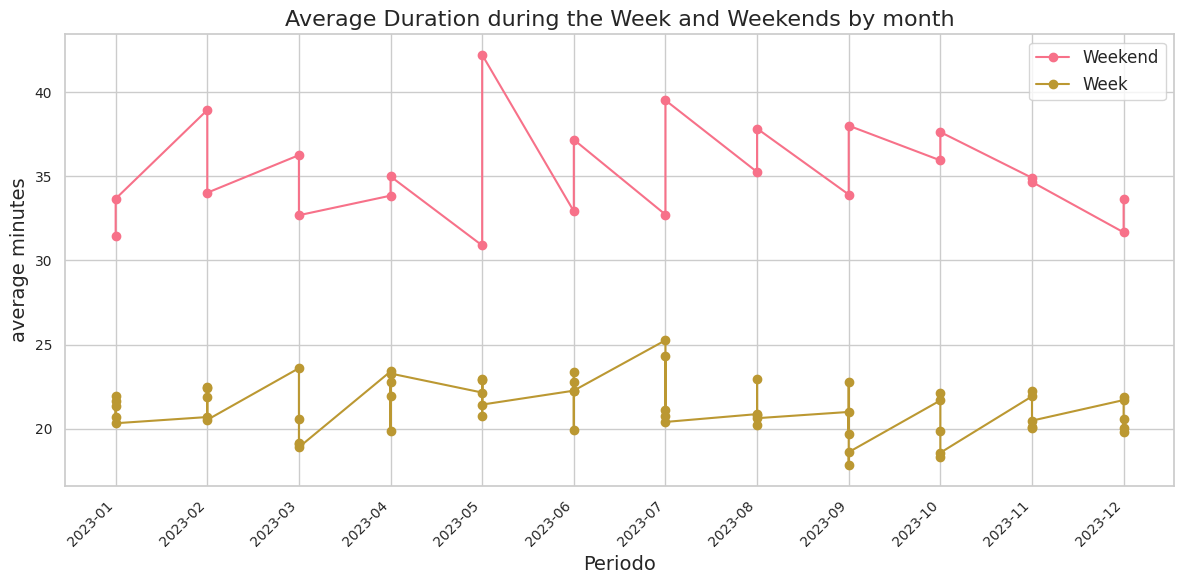

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converti column
recorridos['fecha_origen_recorrido'] = pd.to_datetime(recorridos['fecha_origen_recorrido'])

# Crear columnas para el año-mes y el día de la semana
recorridos['añomes'] = recorridos['fecha_origen_recorrido'].dt.to_period('M')
recorridos['dia_semana'] = recorridos['fecha_origen_recorrido'].dt.day_name()

# Create a datafram
recorridos_dias = recorridos.groupby(['añomes', 'dia_semana']).agg({'duracion_recorrido': 'mean'}).reset_index()

# Create a auxiliar datafram with week and weekends
aux_fin_de_semana = recorridos_dias[recorridos_dias['dia_semana'].isin(['Saturday', 'Sunday'])].reset_index()
aux_semana_laboral = recorridos_dias[~recorridos_dias['dia_semana'].isin(['Saturday', 'Sunday'])].reset_index()

# Estilo Seaborn
sns.set(style="whitegrid")
sns.set_palette("husl")

# lines graph
plt.figure(figsize=(12, 6))
plt.plot(aux_fin_de_semana['añomes'].astype(str), aux_fin_de_semana['duracion_recorrido'], label="Weekend", marker='o')
plt.plot(aux_semana_laboral['añomes'].astype(str), aux_semana_laboral['duracion_recorrido'], label="Week", marker='o')

plt.title('Average Duration during the Week and Weekends by month', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('average minutes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()

# show graph
plt.show()




<ipython-input-17-93b7063b244c>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=recorridos, x='tipo_dia', y='duracion_recorrido', ci=None, estimator='mean', palette='viridis')
<ipython-input-17-93b7063b244c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recorridos, x='tipo_dia', y='duracion_recorrido', ci=None, estimator='mean', palette='viridis')


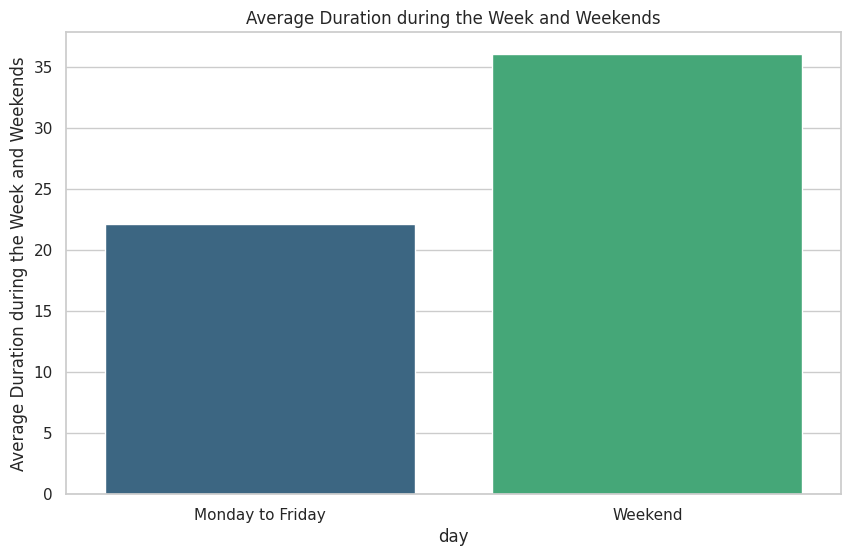

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


recorridos['fecha_origen_recorrido'] = pd.to_datetime(recorridos['fecha_origen_recorrido'])


recorridos['dia_semana'] = recorridos['fecha_origen_recorrido'].dt.dayofweek


recorridos['tipo_dia'] = recorridos['dia_semana'].map({0: 'Monday to Friday', 1: 'Monday to Friday', 2: 'Monday to Friday',
                                                      3: 'Monday to Friday', 4: 'Monday to Friday', 5: 'Monday to Friday',
                                                      6: 'Weekend'})

plt.figure(figsize=(10, 6))
sns.barplot(data=recorridos, x='tipo_dia', y='duracion_recorrido', ci=None, estimator='mean', palette='viridis')
plt.title('Average Duration during the Week and Weekends')
plt.xlabel('day')
plt.ylabel('Average Duration during the Week and Weekends')
plt.show()

The distribution of the routes according to gender can also be analyzed. According to the bar graph, it can be seen that the male gender was the one that used the service the most.

Distribution by gender:
MALE      1580419
FEMALE     790640
OTHER      239306
Name: género, dtype: int64


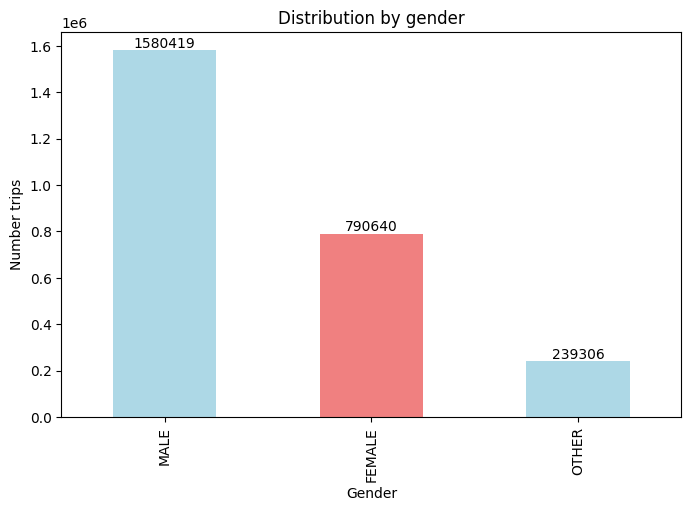

In [13]:
plt.figure(figsize=(8, 5))

# Contar el número de recorridos por género
count_by_gender = recorridos['género'].value_counts()

# Graficar el bar plot
ax = count_by_gender.plot(kind='bar', color=['lightblue', 'lightcoral'])

# Mostrar el número de recorridos en las barras
for i, count in enumerate(count_by_gender):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.title('Distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Number trips')

# Imprimir la distribución por género
print("Distribution by gender:")
print(count_by_gender)

plt.show()

**With the current datasets you can not track the actual retention because as it is, is not possible to track any user_id. What changes would you recommend to have a better data model and KPIs that help the government to achieve the goal of 18% increase?**

Improving the data model to track user retention and achieving a specific increase goal requires a more detailed understanding of the current data structure and the government's objectives. Some general recommendations:

- User Identification:
Implement a user identification system, such as requiring users to create accounts or use some form of unique identifier (e.g., phone number, email).
Assign a unique user ID to each user and track it throughout their interactions with the bike-sharing system.
- Data Collection:
Collect and store user-specific data, including user registration date, frequency of bike usage, and other relevant user behaviors.
Capture data related to user interactions, such as the number of rides, duration, and preferred routes.
- Retention Metrics:
Define key performance indicators (KPIs) related to user retention, such as user churn rate, user lifetime value, and the percentage of users who continue using the service over time.
Calculate and monitor retention metrics to evaluate the effectiveness of the bike-sharing system.
- Segmentation:
Segment users based on different characteristics, such as user demographics, usage patterns, and preferences.
Analyze retention metrics for each user segment to identify specific areas for improvement.
- Communication and Incentives:
Implement targeted communication strategies to re-engage inactive users.
Offer incentives or rewards to users who consistently use the bike-sharing service, encouraging long-term commitment.

**There´s an application that once you open it, it shows riders a map with every
station. If you click on some, it shows available bikes for that specific station. What feature would you add for a better user experience? Which data do you suggest to track and for what?**

To enhance the user experience of the application for the bike-sharing service, consider adding the following features and tracking relevant data:

- Predictive Availability:
Feature: Implement predictive analytics to estimate future bike availability based on historical data, events, and usage patterns.
Data to Track: Gather historical usage patterns, events, and other relevant data to predict future bike availability accurately.
- Station Popularity and Congestion:
Feature: Display the popularity and congestion level of each station.
Data to Track: Track the number of users visiting each station, peak usage hours, and overall congestion to guide users to less crowded stations.
- Dynamic Station Information:
Feature: Provide dynamic information about each station, such as maintenance status, repair schedules, or upcoming events.
Data to Track: Collect data on station maintenance schedules, repair history, and relevant events affecting station operations.
- User Ratings and Feedback:
Feature: Allow users to rate stations and provide feedback on their experiences.
Data to Track: Aggregate user ratings and feedback to identify areas for improvement and highlight well-performing stations.
- Personalized Recommendations:
Feature: Offer personalized recommendations for nearby stations based on the user's historical usage and preferences.
Data to Track: Analyze user behavior, preferred routes, and station usage to provide tailored suggestions.
- Weather Integration:
Feature: Integrate weather information to help users plan rides based on current and forecasted weather conditions.
Data to Track: Include real-time weather data to inform users about the current and upcoming weather at their selected stations.
- Special Promotions and Events:
Feature: Notify users of special promotions, events, or challenges related to bike usage.
Data to Track: Maintain a calendar of promotions, events, and challenges, and track user participation and engagement.